# What Makes a Movie Profitable? Indicators of Box Office Success




## Background ##

In 2016, the [global film industry](https://www.statista.com/topics/964/film/) generated 38 billion US dollars, and revenues are projected to increase to nearly 50 billion US dollars by 2020. However, although a highly profitable industry as a whole, every movie produced also requires a high level of investment from studios, producers, etc. with little guarantee that there will be a return on investment. A movie's profitability is increasingly elusive with the shift in consumer behavior towards media consumption and [rising marketing costs](http://www.hollywoodreporter.com/news/200-million-rising-hollywood-struggles-721818). 
 
The unpredicatability of a movie's profitability was highlighted recently with the failure of the movie ["The Great Wall"](http://www.hollywoodreporter.com/news/what-great-walls-box-office-flop-will-cost-studios-981602). Financed through a joint partnership between the US and China, the movie was expected to be a huge success. Nonetheless, the movie only made 34.8 million US dollars in the North American box office, in comparison with a production budget of 150 million US dollars. 

On the other hand, [Amazon](http://www.businessinsider.com/amazon-investing-well-over-3-billion-in-video-says-analyst-2016-12) has been investing over 3 billion US dollars annually in original content with various success stories such as their investment in "Manchester in the Sea", which recieved six Oscar nominations in 2017. 

The profitability of an individual film is highly unpredictable, but industry investors would be put at ease if there could be some understanding of whether their investments will be worthwhile. Therefore, we want to look at the best indicators to predict a film’s success. We define a film's success by its domestic box office revenue.

## Data ##

Data comes from the following website: https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset

The "IMDB 5000 Movie Set" contains movie data for over 5000 movies made in the past 100 years. The information was scraped from IMDB's database, and attached as a CSV file. 

In this assignment, you are to identify what contributes a movie's success as the success is determined by its gross revenue

Specifically will focus on
   - (15 pts) - Budget vs. Gross Revenue 
   - (15 pts) - IMDB Ratings vs Gross Revenue 
   - (15 pts) - MPAA Ratings vs. Gross Revenue  
   - (15 pts) - Genre vs Gross Revenue     
   - (15 pts) - Director Popularity vs Gross Revenue 
   - (15 pts) - Star Power vs Gross Revenue        
   - (10 pts) and provide your opinion on what makes a movie successful 
                                                     

For this you'll use the pandas package and visualization tool of your choice

## Getting Started


In [1]:
import sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import time
import seaborn as sns
import statsmodels.formula.api as smf
import os
import matplotlib.cm as cm

os.chdir("C:\\Users\\Ritu\\Documents\\Learning\\EL\\2-10-11\\Exercises\\Exploratory Data Analysis Project")

%matplotlib inline
mpl.rcParams['axes.facecolor'] = 'w'
mpl.rcParams['figure.facecolor'] = 'w'

In [643]:
df = pd.read_csv('movie_metadata.csv')

In [644]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [645]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [646]:
# Drop columns
df.drop(df.columns[[0,2,3,4,5,7,13,15,16,17,18,19,24,26,27]], axis=1, inplace=True)
list(df)

['director_name',
 'actor_2_name',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'actor_3_name',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'imdb_score']

In [647]:
# Rename the Columns
df.columns = ['Director','Actor_1','Gross','Genre','Actor_2','Movie_Name','Number_of_Votes','Actor_3','Country', 'Rating', 'Budget', 'Year', 'IMDB_Score']

# Let's see what type variables are in our data frame
print('Variable dtypes:\n', df.dtypes, sep='')

Variable dtypes:
Director            object
Actor_1             object
Gross              float64
Genre               object
Actor_2             object
Movie_Name          object
Number_of_Votes      int64
Actor_3             object
Country             object
Rating              object
Budget             float64
Year               float64
IMDB_Score         float64
dtype: object


In [648]:
# Let's clean up the data set a bit more

# Remove duplicate Movie_Names
# Exclude data without Gross and Budget values
# Reset the index 

df = df.drop_duplicates('Movie_Name')
df = df[pd.notnull(df['Gross']) & pd.notnull(df['Budget'])]

df = df.set_index('Movie_Name')
df.head()

,Director,Actor_1,Gross,Genre,Actor_2,Number_of_Votes,Actor_3,Country,Rating,Budget,Year,IMDB_Score
Movie_Name,,,,,,,,,,,,
Avatar,James Cameron,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,Wes Studi,USA,PG-13,237000000.0,2009.0,7.9
Pirates of the Caribbean: At World's End,Gore Verbinski,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,Jack Davenport,USA,PG-13,300000000.0,2007.0,7.1
Spectre,Sam Mendes,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,Stephanie Sigman,UK,PG-13,245000000.0,2015.0,6.8
The Dark Knight Rises,Christopher Nolan,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,1144337,Joseph Gordon-Levitt,USA,PG-13,250000000.0,2012.0,8.5
John Carter,Andrew Stanton,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,212204,Polly Walker,USA,PG-13,263700000.0,2012.0,6.6


In [649]:
# Year information has decimal numbers
df['Year'].head()

Movie_Name
Avatar                                       2009.0
Pirates of the Caribbean: At World's End     2007.0
Spectre                                      2015.0
The Dark Knight Rises                        2012.0
John Carter                                  2012.0
Name: Year, dtype: float64

In [650]:
#change year to integer to get rid of decimal
df['Year'] = df['Year'].astype(int)

# Review our data types once more
print('Variable dtypes:\n', df.dtypes, sep='')

Variable dtypes:
Director            object
Actor_1             object
Gross              float64
Genre               object
Actor_2             object
Number_of_Votes      int64
Actor_3             object
Country             object
Rating              object
Budget             float64
Year                 int32
IMDB_Score         float64
dtype: object


In [651]:
# Notice that the movies with highest budget are from Korea, Hungary and Japan,


df_bybudget = df.sort_values('Budget', ascending=False)
df_bybudget['Country'].head(5)

Movie_Name
Lady Vengeance        South Korea
Fateless                  Hungary
Princess Mononoke           Japan
Steamboy                    Japan
Akira                       Japan
Name: Country, dtype: object

In [652]:
# Because of currency these movies will skew our analysis
# To adjust, choose data from the US and UK movie industries only. 
# We want to include UK movies because the Bond movies and Harry Potter movies, 
# are listed as UK movies
# Furthermore, the difference between dollar and pound is in orders of magnitude
vlist = ['USA', 'UK']
df = df[df['Country'].isin(vlist)]


# Build a function to adjust dollar value in millions
def millions(number):
    '''show dollar value in millions'''
    return number*(1/1000000)

#Use this millions function to create new columns 
#   - "Budget_inmillion" and 
#   - "Gross_inmillions"
budgetmillions = millions(df['Budget'])
grossmillions = millions(df['Gross'])
df = df.assign(Budget_inmillions=budgetmillions)
df = df.assign(Gross_inmillions=grossmillions)

# New column names are:
list(df)

['Director',
 'Actor_1',
 'Gross',
 'Genre',
 'Actor_2',
 'Number_of_Votes',
 'Actor_3',
 'Country',
 'Rating',
 'Budget',
 'Year',
 'IMDB_Score',
 'Budget_inmillions',
 'Gross_inmillions']

In [653]:
df.head()

,Director,Actor_1,Gross,Genre,Actor_2,Number_of_Votes,Actor_3,Country,Rating,Budget,Year,IMDB_Score,Budget_inmillions,Gross_inmillions
Movie_Name,,,,,,,,,,,,,,
Avatar,James Cameron,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,Wes Studi,USA,PG-13,237000000.0,2009,7.9,237.0,760.505847
Pirates of the Caribbean: At World's End,Gore Verbinski,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,Jack Davenport,USA,PG-13,300000000.0,2007,7.1,300.0,309.404152
Spectre,Sam Mendes,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,Stephanie Sigman,UK,PG-13,245000000.0,2015,6.8,245.0,200.074175
The Dark Knight Rises,Christopher Nolan,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,1144337,Joseph Gordon-Levitt,USA,PG-13,250000000.0,2012,8.5,250.0,448.130642
John Carter,Andrew Stanton,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,212204,Polly Walker,USA,PG-13,263700000.0,2012,6.6,263.7,73.058679


In [654]:
# Now we can get rid of the old columns "Budget" and "Gross"
df = df.drop(['Budget','Gross'], 1)

# Rename the new values in millions as:
#  "Budget_inmillions"  ---> "Budget"
#  "Gross_inmillions"   ---> "Gross"
df = df.rename(columns={'Budget_inmillions': 'Budget', 'Gross_inmillions': 'Gross'})
# Let's look and our list of variables and their types
print('Variable dtypes:\n', df.dtypes, sep='')

Variable dtypes:
Director            object
Actor_1             object
Genre               object
Actor_2             object
Number_of_Votes      int64
Actor_3             object
Country             object
Rating              object
Year                 int32
IMDB_Score         float64
Budget             float64
Gross              float64
dtype: object


## (1) Budget vs. Gross Revenue

#### Analysis & Visualization of Budget trends

In [655]:
# Create a new data frame called df_budget that has only
# - Year
# - Budget, and
# - Gross
# Drop every other column

df_budget = df.drop(['Director','Actor_1','Actor_2','Actor_3','Genre','Country','Rating','IMDB_Score','Number_of_Votes'], 1)
df_budget.head()

,Year,Budget,Gross
Movie_Name,,,
Avatar,2009,237.0,760.505847
Pirates of the Caribbean: At World's End,2007,300.0,309.404152
Spectre,2015,245.0,200.074175
The Dark Knight Rises,2012,250.0,448.130642
John Carter,2012,263.7,73.058679


Text(0,0.5,'Gross')

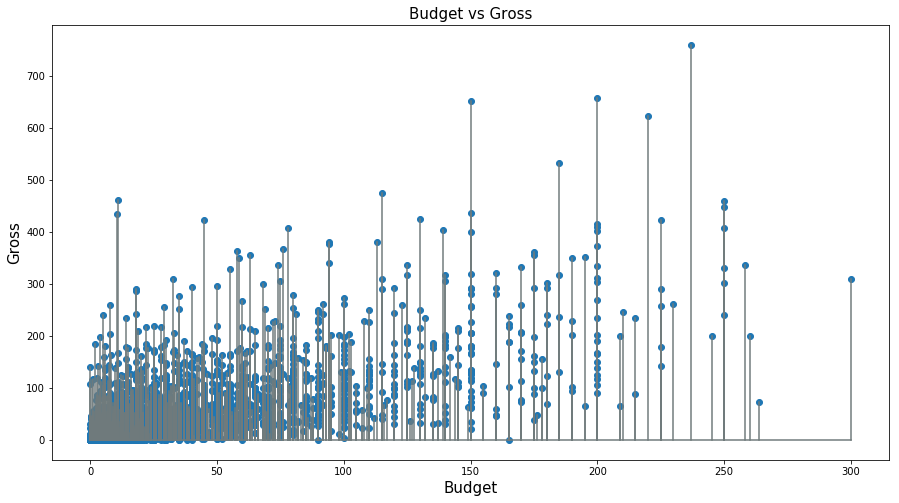

In [656]:
# Plot of Budget vs Gross
fig, ax = plt.subplots(figsize=(15, 8))

ax.stem(df_budget.Budget, df_budget.Gross, '#707B7C', markerfmt='C0o', basefmt='#707B7C')
ax.set_title("Budget vs Gross", fontsize=15)
ax.set_xlabel("Budget", fontsize=15)
ax.set_ylabel("Gross", fontsize=15)


Text(0,0.5,'Budget')

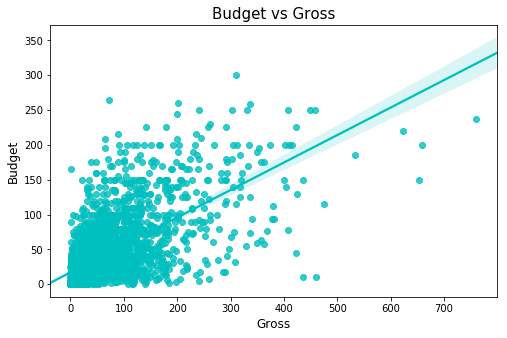

In [657]:
## Budget vs. Gross Revenue
# Look at the relationship between Budget and Gross profit. 
# Big Hollywood studios tend to invest millions of dollars in productions they want to see perform well. 
# Assumption is that movies with big budgets often become global blockbusters, 
# given the amount invested in special effects, marketing & advertising, etc. 
# Let's see if this is actually true

f, ax = plt.subplots(figsize=(8, 5))
sns.regplot(x = 'Gross', y = 'Budget', data=df_budget, color='c')
ax.set_title("Budget vs Gross", fontsize=15)
ax.set_xlabel("Gross", fontsize=12)
ax.set_ylabel("Budget", fontsize=12)

In [658]:
# If we run regression on the Budget vs Gross income data, 
# rSquare value is although positive but not that convincing
regression = smf.ols('Budget ~ Gross ', data=df_budget).fit()

In [659]:
regression.rsquared

# This indicates that the higher the average production budget, 
# the higher the movie's box office performance. 
# This can be explained by a number of factors: 
#   - increased spending on marketing, 
#   - expensive special effects to attract a wider audience, 
#   - elaborate action sequences, 
#   - famous high-paid actors, etc. 

# However, one issue in our data set is that we didn't account for inflation, 
# and considering it includes movies from the 1930s onwards, 
# it wouldn't make sense to compare old movies to newer ones. 

0.42452350874230282

Text(0,0.5,'Gross')

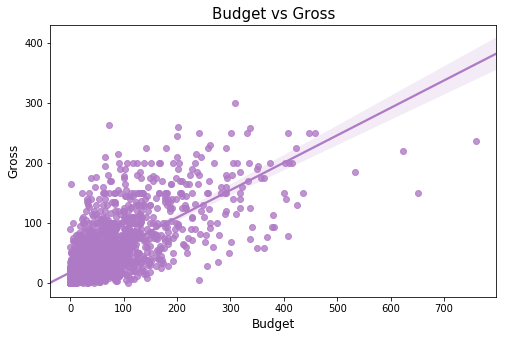

In [660]:
### Focusing on data post-2000

# let's focus on movies post-2000. 
# Since it's not long period of time, the impact of inflation will not bw that pronounced


# Start with sorting the df_budget table by year
df_budget = df_budget.sort_values('Year', ascending=False)
df_budget.head()

# Select only the movies from 2000 to 2017
yearlist = range(2000,2017)
df_newbudget = df_budget[df_budget['Year'].isin(yearlist)]


# Look at the scatter plot
f, ax = plt.subplots(figsize=(8, 5))
sns.regplot(x = 'Gross', y = 'Budget', data=df_newbudget, color='#AF7AC5')
ax.set_title("Budget vs Gross", fontsize=15)
ax.set_xlabel("Budget", fontsize=12)
ax.set_ylabel("Gross", fontsize=12)

In [661]:
regression = smf.ols('Budget ~ Gross', data=df_newbudget).fit()
regression.rsquared

# rSquared value now has increased to 0.51, 
# meaning that we're on the right path 
# there is a correlation between budget and box office grosses, 
# confirming our initital hypothesis that higher production costs, on average, 
# lead to higher revenues (given the amount invested in star power, marketing, etc.) 

0.50981287883851722

Text(0.5,1,'Average Budget v. Gross Revenue')

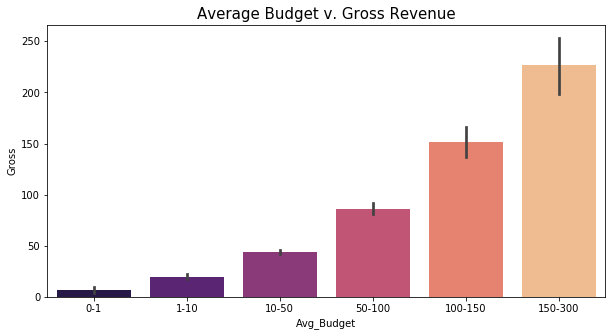

In [662]:
# To better visualize this relationship, let's bin budget ranges into buckets 
# (0-1, 1-10, 10-50, 50-100, 100-150, and 150-300) and 
# add a new column called "Avg Budget" with these new values

bins = [0,1,10,50,100,150,301]
group_names = ['0-1','1-10','10-50','50-100','100-150','150-300']

df_budget = df_budget.sort_values('Budget', ascending=False)
categories = pd.cut(df_budget['Budget'], bins, labels=group_names)
df_budget['Avg_Budget'] = pd.cut(df_budget['Budget'], bins, labels=group_names)

# lets look at how many movies are in each budget range
pd.value_counts(df_budget['Avg_Budget'])

# Generate a bar chart of gross revenues.
f, ax = plt.subplots(figsize=(10, 5))
Budget = sns.barplot(x="Avg_Budget", y="Gross", data=df_budget, palette="magma")
Budget.axes.set_title('Average Budget v. Gross Revenue', fontsize=15)

Text(0.5,1,'Average Budget v. Gross Revenue')

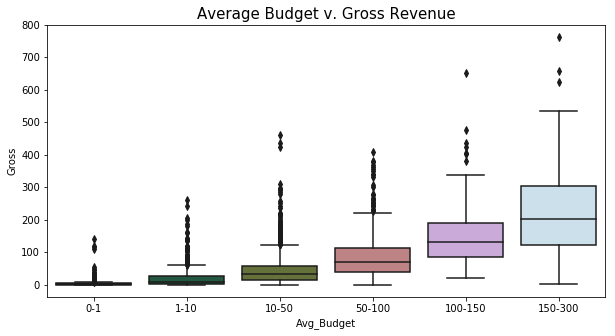

In [663]:
# Generate a bar chart of gross revenues.
f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x="Avg_Budget", y="Gross", data=df_budget, palette="cubehelix")
ax.set_title('Average Budget v. Gross Revenue', fontsize=15)

## (2) IMDB Ratings vs Gross Revenue

#### Analysis & Visualization of IMDB Scores

Filter out the original dataset & view the data for IMDB scores

In [664]:
# Take a subset of columns from df for IMDB score analysis
df_imdb = df.drop(['Director','Actor_1','Actor_2','Actor_3','Budget','Country','Rating','Genre','Year'], 1)

# Remove nulls from IMDB score dataset
df_imdb = df_imdb[pd.notnull(df_imdb['IMDB_Score']) & pd.notnull(df_imdb['Number_of_Votes'])]

In [665]:
# Print the datatypes from IMDB score dataset
print ('Variable types:\n', df_imdb.dtypes, sep='')

Variable types:
Number_of_Votes      int64
IMDB_Score         float64
Gross              float64
dtype: object


In [666]:
# Print the initial records from IMDB score dataset
df_imdb.head()

,Number_of_Votes,IMDB_Score,Gross
Movie_Name,,,
Avatar,886204,7.9,760.505847
Pirates of the Caribbean: At World's End,471220,7.1,309.404152
Spectre,275868,6.8,200.074175
The Dark Knight Rises,1144337,8.5,448.130642
John Carter,212204,6.6,73.058679


#### Analysis of IMDB Scores vs Gross

In [667]:
# To better visualize the distribution of IMDB scores,, let's bin budget ranges into buckets 
# (0-1, 1-2, 2-3, 3-4, 4-5, 5-6, 6-7, 7-8, 8-9 and 9-10) and 
# add a new column called "Scores_groups" with these new values

In [668]:
bins = [0,1,2,3,4,5,6,7,8,9,10]
group_names = ['1','2','3','4','5','6','7','8','9','10']
df_imdb['Score_groups'] = pd.cut(df_imdb['IMDB_Score'], bins, labels=group_names)

# View the IMDB Score table with the newly added column
df_imdb.head()

,Number_of_Votes,IMDB_Score,Gross,Score_groups
Movie_Name,,,,
Avatar,886204,7.9,760.505847,8
Pirates of the Caribbean: At World's End,471220,7.1,309.404152,8
Spectre,275868,6.8,200.074175,7
The Dark Knight Rises,1144337,8.5,448.130642,9
John Carter,212204,6.6,73.058679,7


Text(0,0.5,'IMDB Score Groups')

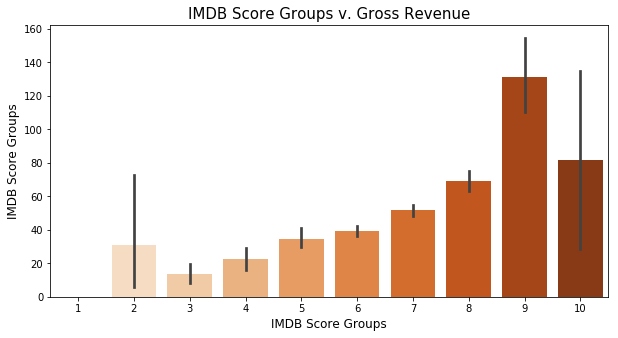

In [669]:
# Generate a bar chart of IMDB Score Groups & Gross
f, ax = plt.subplots(figsize=(10, 5))
scores = sns.barplot(x="Score_groups", y="Gross", data=df_imdb, palette="Oranges")
scores.axes.set_title('IMDB Score Groups v. Gross Revenue', fontsize=15)
scores.axes.set_xlabel('IMDB Score Groups', fontsize=12)
scores.axes.set_ylabel('IMDB Score Groups', fontsize=12)

In [670]:
# View the correlation between IMDB Score & Gross
c = df_imdb['IMDB_Score'].corr(df_imdb['Gross'])
print ('Correlation between IMDB Score & Gross :\n', c, sep='')

Correlation between IMDB Score & Gross :
0.251847792163


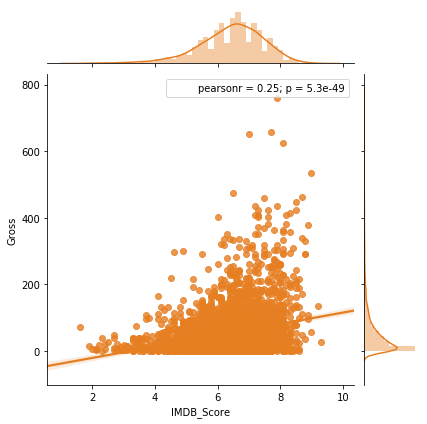

In [671]:
# Plot  IMDB Score vs Gross
sns.jointplot("IMDB_Score", "Gross", data=df_imdb, kind='reg', color='#E67E22');

In [672]:
# Above shows the correlation between IMDB scores & Gross
# A point to note here is that the IMDB score will be affected by the Number of Voters
# To understand this, let us see if there is any relation between the 3 variables
# IMDB Score, Number of Voters, Gross

#### Analysis of IMDB scores vs Number of Votes vs Gross

In [673]:
# Build a function to convert a number on a 10000's scale
def thou(number):
    '''show dollar value in 10,000s'''
    return number*(1/10000)


#Use this function to create a new column
# "Number_of_Votes" in 10.1000's
# For better visualization
voters_thou = thou(df_imdb['Number_of_Votes'])

df_imdb = df_imdb.assign(Votes_in_Thou=voters_thou)
df_imdb = df_imdb.drop(['Number_of_Votes'], 1)
df_imdb = df_imdb.rename(columns={'Votes_in_Thou' : 'Number_of_Votes'})

In [674]:
# Correlation of Number of Votes by Gross
c = df_imdb['Number_of_Votes'].corr(df_imdb['Gross'])
print ('Correlation between Number of Votes & Gross :\n', c, sep='')

# This shows a higher correlation than between IMDB score & Gross

Correlation between Number of Votes & Gross :
0.632122448331


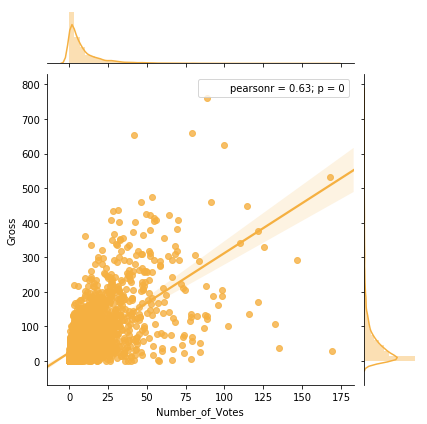

In [675]:
# Plot Number of Votes vs Gross
sns.jointplot("Number_of_Votes", "Gross", data=df_imdb, kind='reg', color='#F5B041');

# Following plot  shows positive association
# with a higher r value (0.63) than Gross vs IMDB score (0.25)

In [676]:
# Next we will bin the Number of Votes into 4 categories
# Low(0-50 votes), Average(50-100 votes), Good(100-150 votes), High(150-200 votes)
# add a new column called "Votes_Groups" with these new values

In [677]:
# Define the bins
bins1 = [0,50,100,150,200]
group_names1 = ['Low','Average','Good','High']

# Add column IMDB_Score_cat to break IMDB scores into these groups
df_imdb['Votes_Groups'] = pd.cut(df_imdb['Number_of_Votes'], bins1, labels=group_names1)

#View the newly create dataset
df_imdb.head()

,IMDB_Score,Gross,Score_groups,Number_of_Votes,Votes_Groups
Movie_Name,,,,,
Avatar,7.9,760.505847,8,88.6204,Average
Pirates of the Caribbean: At World's End,7.1,309.404152,8,47.1220,Low
Spectre,6.8,200.074175,7,27.5868,Low
The Dark Knight Rises,8.5,448.130642,9,114.4337,Good
John Carter,6.6,73.058679,7,21.2204,Low


Visualize distribution of the 3 variables

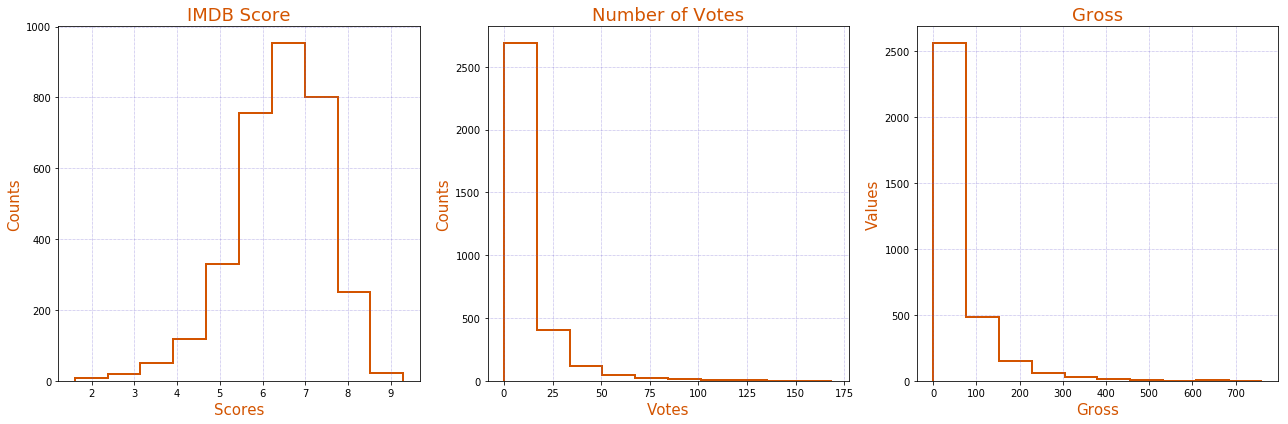

In [683]:
# View distribution of the 3 variables
fig, ax = plt.subplots(1, 3, figsize=(18, 6))


# Plot distribution of IMDB scores
df_imdb['IMDB_Score'].plot(kind='hist', color = '#D35400', histtype='step', ax=ax[0], linewidth=2)
ax[0].set_title("IMDB Score", fontsize=18, color = '#D35400')
ax[0].set_xlabel("Scores", fontsize=15, color = '#D35400')
ax[0].set_ylabel("Counts", fontsize=15, color = '#D35400')
ax[0].grid(color="slateblue", which="both", linestyle=':', linewidth=0.5)

# Plot distribution of Number of Votes
df_imdb['Number_of_Votes'].plot(kind='hist', color = '#D35400', histtype='step', ax=ax[1], linewidth=2)
ax[1].set_title("Number of Votes", fontsize=18, color = '#D35400')
ax[1].set_xlabel("Votes", fontsize=15, color = '#D35400')
ax[1].set_ylabel("Counts", fontsize=15, color = '#D35400')
ax[1].grid(color="slateblue", which="both", linestyle=':', linewidth=0.5)

# Plot distribution of Gross
df_imdb['Gross'].plot(kind='hist', color = '#D35400', histtype='step', ax=ax[2], linewidth=2)
ax[2].set_title("Gross", fontsize=18, color = '#D35400')
ax[2].set_xlabel("Gross", fontsize=15, color = '#D35400')
ax[2].set_ylabel("Values", fontsize=15, color = '#D35400')
ax[2].grid(color="slateblue", which="both", linestyle=':', linewidth=0.5)

fig.tight_layout()

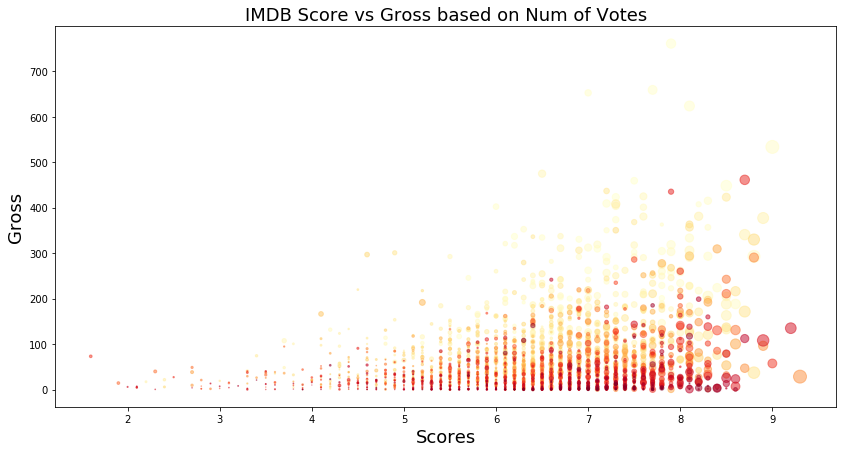

In [685]:
colors = cm.YlOrRd(np.linspace(0,1,len(df_imdb)))

f, ax = plt.subplots(figsize=(14, 7))
plt.scatter(df_imdb['IMDB_Score'], df_imdb['Gross'], s=df_imdb['Number_of_Votes'], color=colors, alpha=0.5)
ax.set_title("IMDB Score vs Gross based on Num of Votes", fontsize=18)
ax.set_xlabel("Scores", fontsize=18)
ax.set_ylabel("Gross", fontsize=18)
plt.show()

In [686]:
# Drop the Score groups & Number of Votes columns
df_imdb = df_imdb.drop(['Score_groups', 'Number_of_Votes'], 1)

In [687]:
# View the updated dataset
df_imdb.head()

,IMDB_Score,Gross,Votes_Groups
Movie_Name,,,
Avatar,7.9,760.505847,Average
Pirates of the Caribbean: At World's End,7.1,309.404152,Low
Spectre,6.8,200.074175,Low
The Dark Knight Rises,8.5,448.130642,Good
John Carter,6.6,73.058679,Low


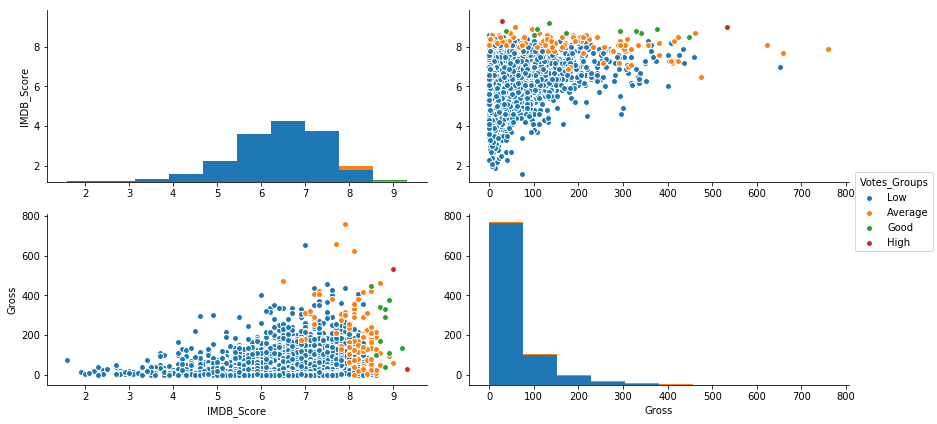

In [688]:
# Plot of IMDB_Score vs Gross, with reference on Groups per Number of Votes
sns.pairplot(df_imdb, hue = 'Votes_Groups', palette = 'tab10', size=3, aspect=2)

In [689]:
# Observations:

### Number of Voters vs Gross
# - There are more movies with Low Number of votes (0-25,000 voters)
    # - Movies with higher number of voters keeps decreasing
# - There are more movies which grossed between 0-100 million
    # - Movies with higher grosses are lesser
# It could be that because of this trend, that we see a higher correlation between Gross & Number of Voters (0.63)

### IMDB score vs Gross
# - There is lesser correlation between IMDB score & Gross (0.25)
# - A higer IMDB score does not neccessarily imply a higher Gross
# - This might be because the IMDB score is biased, depending on the Number of Voters, or other factors

### Number of Voters vs IMDB score
# - Movies with Good to Avegage number of voters (25,000 - 150,000) have higher IMDB scores (above 7)
# - Movies with High Number of Voters (above 150,000) have higher IMDB scores (above 8.5)
# Movies with Low Number of Voters have Lower IMDB scores
    # However, since low group of voters comprises for the max number of voters
    # Low number of Voters (0-25,000) also correspond to most IMDB scores between (0-7)

## (3) MPAA Ratings vs. Gross Revenue

#### Analysis & Visualization of MPAA Ratings' distribution

In [690]:
# Take a subset of columns from df for IMDB score analysis
df_mpaa = df[['Rating', 'Gross']].copy()
df_mpaa = df_mpaa.fillna('Unrated')

In [691]:
# View the distinct values for Ratings
df_mpaa['Rating'].unique()

array(['PG-13', 'PG', 'G', 'R', 'Approved', 'X', 'Not Rated', 'M',
       'Unrated', 'GP', 'NC-17', 'Passed'], dtype=object)

In [692]:
# Remove Movie Name index from mpaa dataset
df_mpaa = df_mpaa.reset_index()
df_mpaa = df_mpaa.drop(['Movie_Name'], 1)

In [693]:
df_mpaa.head()

,Rating,Gross
0,PG-13,760.505847
1,PG-13,309.404152
2,PG-13,200.074175
3,PG-13,448.130642
4,PG-13,73.058679


#### Plotting the Data

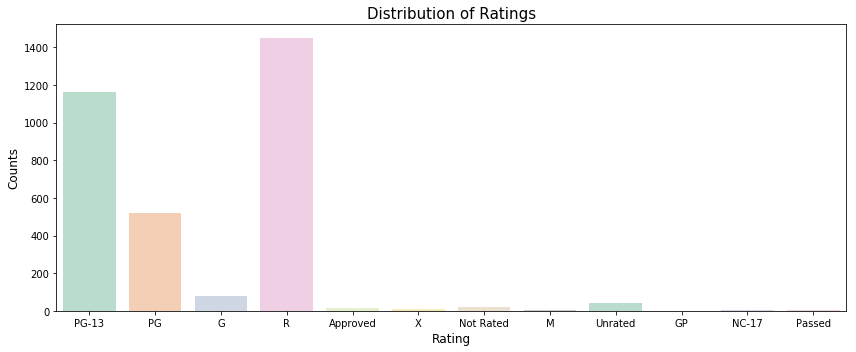

In [694]:
# Plot of Distribution of MPAA Ratings' counts 
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='Rating', data=df_mpaa, palette='Pastel2')
ax.set_title("Distribution of Ratings", fontsize=15)
ax.set_xlabel("Rating", fontsize=12)
ax.set_ylabel("Counts", fontsize=12)
plt.tight_layout()

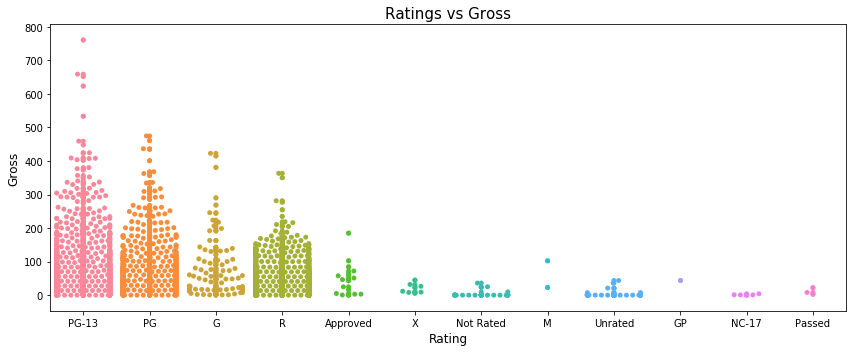

In [695]:
# Plot of MPAA Ratings vs Gross
fig, ax = plt.subplots(figsize=(12,5))

sns.stripplot(x="Rating", y="Gross", data=df_mpaa, ax = ax)
sns.swarmplot(x="Rating", y="Gross", data=df_mpaa, ax = ax)

ax.set_title("Ratings vs Gross", fontsize=15)
ax.set_xlabel("Rating", fontsize=12)
ax.set_ylabel("Gross", fontsize=12)

plt.tight_layout()

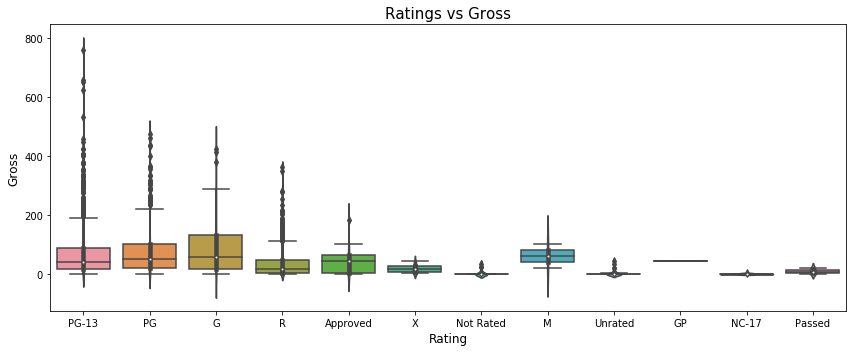

In [696]:
# Another plot of MPAA Ratings vs Gross
fig, ax = plt.subplots(figsize=(12,5))

sns.boxplot(x="Rating", y="Gross", data=df_mpaa, ax = ax)
sns.violinplot(x="Rating", y="Gross", data=df_mpaa, ax = ax)

ax.set_title("Ratings vs Gross", fontsize=15)
ax.set_xlabel("Rating", fontsize=12)
ax.set_ylabel("Gross", fontsize=12)

plt.tight_layout()

In [697]:
# Observations:

    # PG-13, PG, G & R are the highest Grossing
    # Whereas the most popular Ratings are in order: R, PG-13, PG, G
    # So, Gross is higher for Movies with Ratings  PG-13, PG, G - but for R Rating there is a lesser impact 

## (4) Genre vs Gross Revenue

#### Analysis & Visualization of individual Genres

First we will analyze the data from Genre column on its own

In [698]:
# Create a new data frame called df_genre that has only
# - Year
# - Gross
# - Genre
# Drop every other column

df_genre = df[['Genre','Year','Gross']].copy()

df_genre.head()

,Genre,Year,Gross
Movie_Name,,,
Avatar,Action|Adventure|Fantasy|Sci-Fi,2009,760.505847
Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,2007,309.404152
Spectre,Action|Adventure|Thriller,2015,200.074175
The Dark Knight Rises,Action|Thriller,2012,448.130642
John Carter,Action|Adventure|Sci-Fi,2012,73.058679


Let's visualize which genres are more prevalent, by using the wordcount method 
And then have a look at their overall distribution

In [699]:
# Import lib for word cloud visualization
from wordcloud import WordCloud

# Define function for counting words
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

# From df_genre, generate a list of only genres
genre_list = list()
for g in df_genre['Genre'].str.split('|').values:
    genre_list.append(g)
    

# Convert genres list to str for wordc cloud
genre = ' '.join(str(r) for v in genre_list for r in v)

# Count occurence of each genre
cnt = word_count(genre)

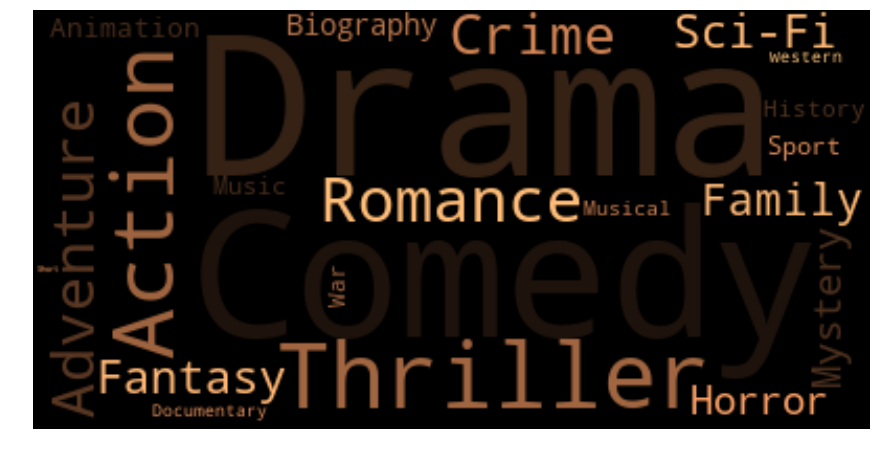

In [700]:
# Generate wordcloud for the count of each Genre
wordcloud = WordCloud(colormap="copper").generate_from_frequencies(cnt)

# Display word cloud
fig = plt.figure(figsize=(15, 25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

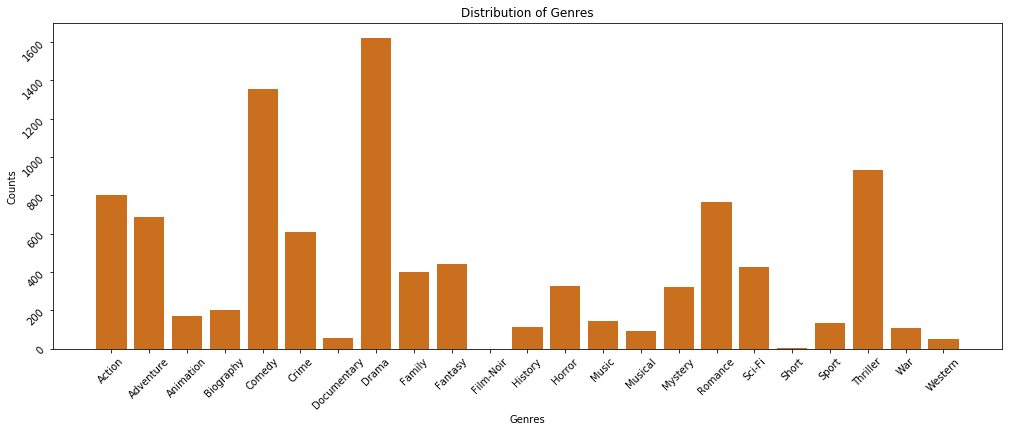

In [701]:
# Plotting the distribution of genres using histograms
fig, ax = plt.subplots(figsize=(17, 6))

plt.bar(cnt.keys(), cnt.values(), color='#CA6F1E')

ax.set_title("Distribution of Genres", fontsize=12)
ax.set_ylabel("Counts")
ax.set_xlabel("Genres")

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_rotation(45)

plt.show()

#### Evolution of genres over the years

Now let's figure out, how the genres have developed over time
If there have been changes in the dominance of a particular genre over the years

In [702]:
# Since there are multiple values of Genre per movie
# Let's first split it into individual Genres

# Extract the Year column & split the Genres into individual genres
# into a new dataset - genre_year
genre_year = pd.concat([pd.Series(row['Year'], row['Genre'].split('|'))              
                    for _, row in df_genre.iterrows()]).reset_index()

genre_year.columns = ['Genre', 'Year']

# Then we can group by the different genres
grouped = genre_year.groupby('Genre')

In [703]:
# In order to visualize how genres have evolved over the years
# Let's first bin the years into different groups

bins = [1920,1990,2000,2010,2020]
group_names = ['1920-1990','1990-2000','2000-2010','2010-Current']

# Then we can add a new column to the dataset
# "Year_bin" - containing the group of year per the bins
genre_year_bin = genre_year[['Genre', 'Year']].copy()
genre_year_bin['Year_bin'] = pd.cut(genre_year_bin['Year'], bins, labels=group_names)

# We can now drop the Year column from the dataset, keeping only the year bins
genre_year_bin = genre_year_bin.drop(['Year'], 1)

# And view the updated dataset
genre_year_bin.head()

,Genre,Year_bin
0,Action,2000-2010
1,Adventure,2000-2010
2,Fantasy,2000-2010
3,Sci-Fi,2000-2010
4,Action,2000-2010


Now let's see the Year-group-wise distribution of each Genre

In [704]:
# Create grouping of count of each genre per the Year bins
x = genre_year_bin.groupby(['Year_bin', 'Genre'])

# Save the counts & view as a dataframe
y = x.size()
z = y.unstack()
z.fillna(0)

# Display the data of count of genres per year group
z

Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
Year_bin,,,,,,,,,,,,,,,,,,,,,
1920-1990,88.0,90.0,4.0,19.0,91.0,41.0,2.0,119.0,23.0,50.0,...,19.0,24.0,17.0,64.0,55.0,1.0,9.0,83.0,19.0,13.0
1990-2000,193.0,141.0,30.0,41.0,335.0,179.0,4.0,432.0,80.0,95.0,...,30.0,19.0,74.0,185.0,97.0,NaN,30.0,239.0,20.0,13.0
2000-2010,312.0,278.0,86.0,80.0,654.0,266.0,32.0,728.0,209.0,195.0,...,66.0,35.0,157.0,402.0,156.0,1.0,70.0,402.0,55.0,16.0
2010-Current,209.0,177.0,52.0,64.0,274.0,121.0,19.0,339.0,88.0,104.0,...,31.0,16.0,73.0,112.0,117.0,NaN,27.0,209.0,17.0,9.0


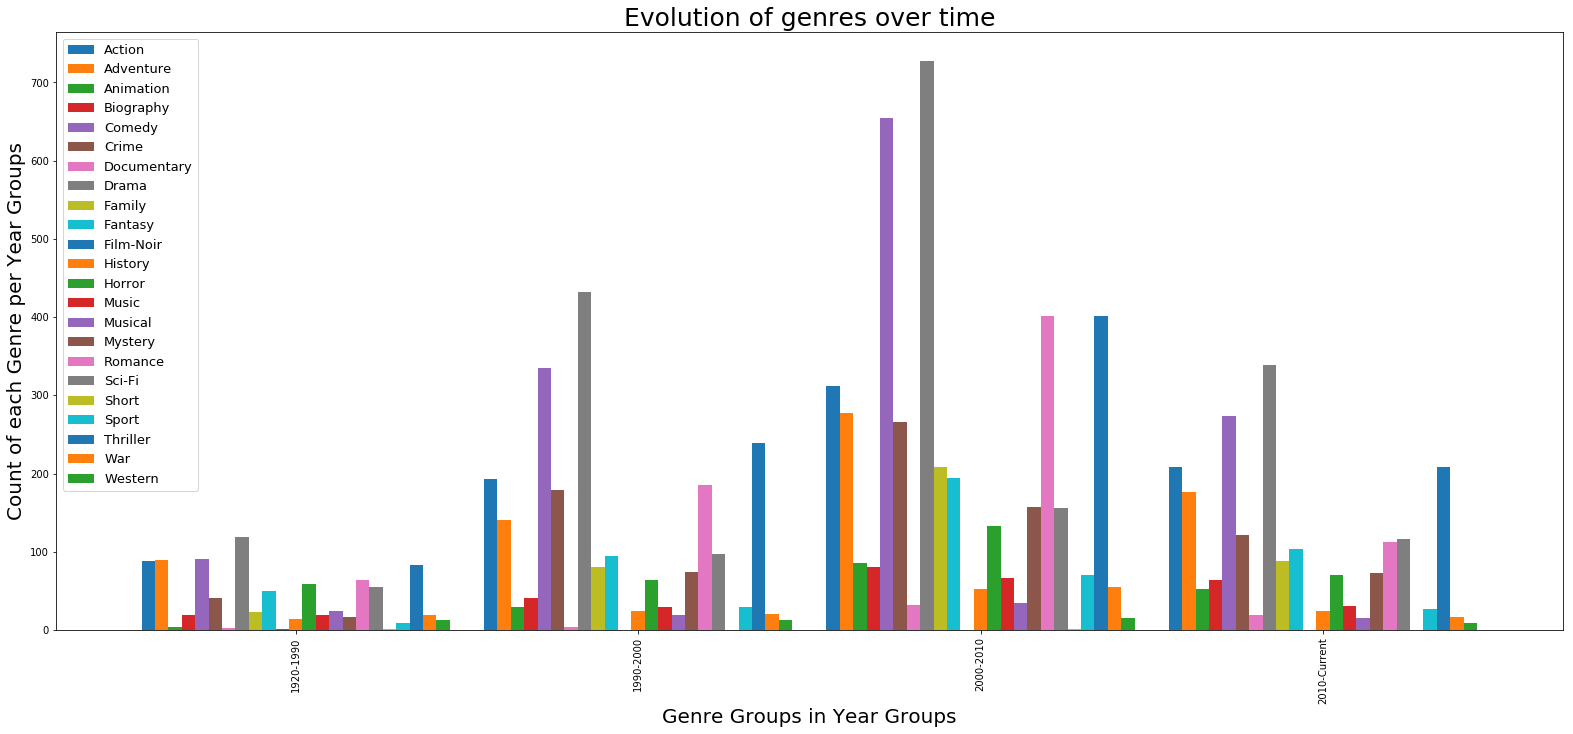

In [705]:
# Plot the evolution of genres over time
fig, ax = plt.subplots(figsize=(27,11))
z.plot(kind='bar',ax=ax, width=0.9)
ax.set_title("Evolution of genres over time", fontsize=25)
ax.set_xlabel("Genre Groups in Year Groups", fontsize=20)
ax.set_ylabel("Count of each Genre per Year Groups", fontsize=20)
ax.legend(fontsize=13)

In [706]:
# Observations:
    # - There is a significant increase in number of films since 1990
    # - Here, the 2010-Current data is incomplete, since data is there till 2016 only
    # - Drama & Comedy are the most popular Genres over most of the time 
        # - This is the same observation from WordCount plot & histogram earlier
        # - Followed by Thriller, Action & Adventure

#### Genres vs. Gross

Now let's see how the Genres have impacted Gross over time

In [707]:
# Extract  & split the Genres into individual genres
# into a new dataset - genres
genres = df_genre.Genre.str.split('|', expand=True).stack().reset_index(level=1, drop=True)

# Convert to a Dataframe
genres = pd.DataFrame({'Movie_Name':genres.index, 'Genre':genres.values})
genres = genres.set_index('Movie_Name')

# View the genres dataset
genres.head()

,Genre
Movie_Name,
Avatar,Action
Avatar,Adventure
Avatar,Fantasy
Avatar,Sci-Fi
Pirates of the Caribbean: At World's End,Action


In [708]:
# Now let's merge the genres list with original genres dataset
genre_year_gross = df_genre.drop(['Genre'], axis=1).join(genres).reset_index(drop=True)

# View the new dataset
genre_year_gross.head()

,Year,Gross,Genre
0,2016,71.897215,Drama
1,2016,71.897215,Horror
2,2016,71.897215,Mystery
3,2016,71.897215,Sci-Fi
4,2016,71.897215,Thriller


In [709]:
# Now we will again group the years into the same bins that were defined earlier
genre_year_gross['Year_bin'] = pd.cut(genre_year_gross['Year'], bins, labels=group_names)
genre_year_gross = genre_year_gross.drop(['Year'], 1)

And then create the Year-group-wise distribution of each Genre
Howver, this time, instead of the count of genres, 
The grouping value will be the total Gross of that Genre for that Year Group

In [710]:
# Create grouping of Total Gross for each genre per the Year bins
x1 = genre_year_gross.groupby(['Year_bin', 'Genre'])

# Save the data & view as a dataframe
y1 = x1.sum()
z1 = y1.unstack()
z1.fillna(0)

# Display the data for Total Gross of each genre per year group
z1

Gross                                           \
Genre               Action     Adventure     Animation    Biography   
Year_bin                                                              
1920-1990      5995.177032   5770.794570    393.718331   904.161329   
1990-2000     12679.193287  11562.543855   2777.864994  1447.705143   
2000-2010     26662.509459  29766.895892  10121.753591  2934.390526   
2010-Current  20641.536889  23804.856750   6856.611055  3017.628469   

                                                                    \
Genre               Comedy         Crime Documentary         Drama   
Year_bin                                                             
1920-1990      5288.356330   2194.206781   20.006368   6530.520476   
1990-2000     14653.221914   7215.997813   48.663375  18110.260918   
2000-2010     32586.468996  10490.693385  481.914394  25296.631276   
2010-Current  18300.008311   5926.008415  214.594375  15478.322559   

                                             ...                   \
Genre               Family       Fantasy     ...            Music   
Year_bin                                     ...                    
1920-1990      2156.677298   3318.839733     ...       870.881464   
1990-2000      5883.022763   5999.734219     ...       907.977908   
2000-2010     19733.920930  19970.184468     ...      2812.294404   
2010-Current  10032.428952  10592.044202     ...      1230.712999   

                                                                              \
Genre             Musical      Mystery       Romance        Sci-Fi     Short   
Year_bin                                                                       
1920-1990     1114.058275   458.380683   3422.377603   4038.866794  0.333658   
1990-2000     1541.410973  4435.895845   8895.006597   6288.350490       NaN   
2000-2010     1621.234570  8320.061032  17564.074341  12409.125842  7.518876   
2010-Current  1307.334295  3566.661502   5342.886895  15172.784468       NaN   

                                                                  
Genre               Sport      Thriller          War     Western  
Year_bin                                                          
1920-1990      503.248479   3763.291809  1230.951689  663.125894  
1990-2000     1386.611587  12870.844471  1176.568124  623.357361  
2000-2010     2986.539558  18895.737238  2015.704448  573.145916  
2010-Current  1254.361885  13103.176164  1485.014347  665.506486  

[4 rows x 23 columns]

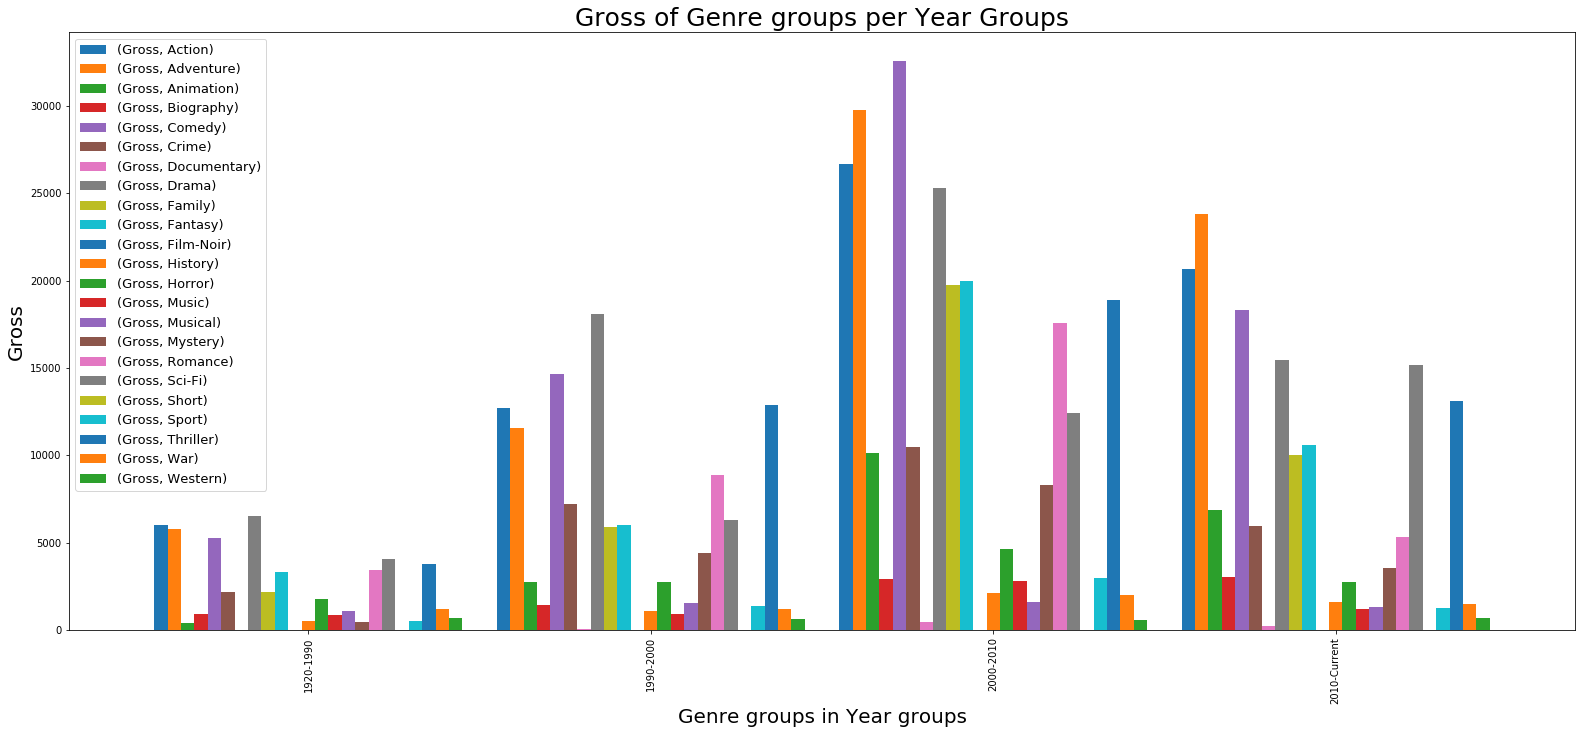

In [711]:
# Plot the Impact of genres on Gross
fig, ax = plt.subplots(figsize=(27,11))
z1.plot(kind='bar',ax=ax, width=0.9)
ax.set_title("Gross of Genre groups per Year Groups", fontsize=25)
ax.set_xlabel("Genre groups in Year groups", fontsize=20)
ax.set_ylabel("Gross", fontsize=20)
ax.legend(fontsize=13)

In [712]:
# Observations:
    # - Again here, the 2010-Current data is incomplete, since data is there till 2016 only
    # - The trends for highest Grossing genres are different from the most popular Genres trends 
        # - Comedy, Adventure, Action are higher Grossers than Drama

Now let's compare the 2 graphs:
    - Genres with Years
    - Genres with Gross

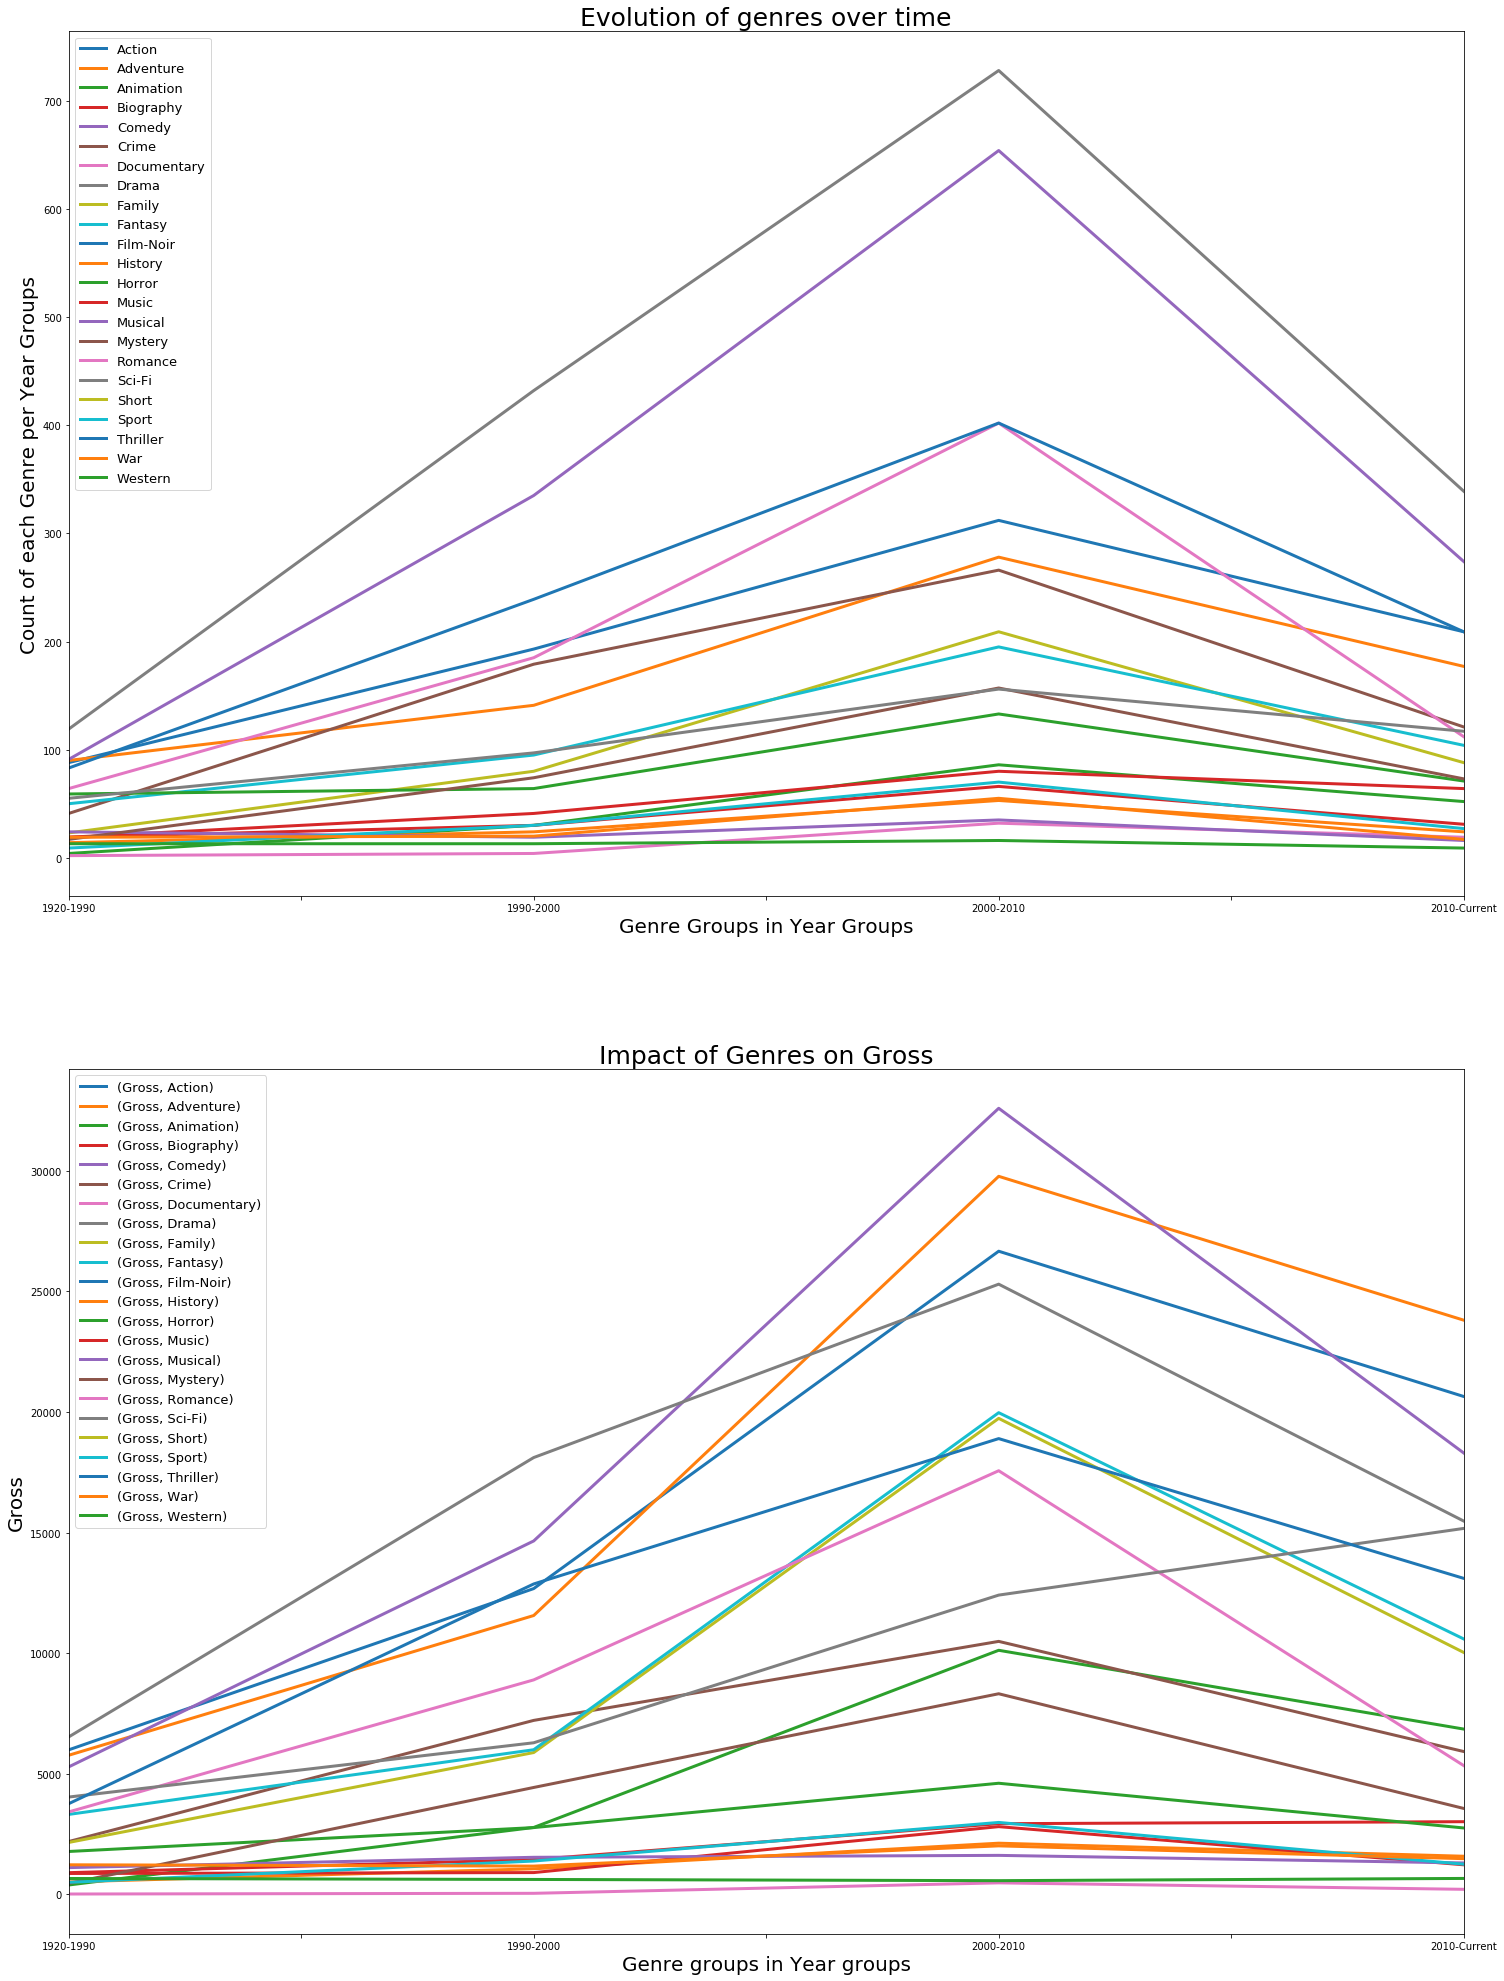

In [714]:
fig, (ax1,ax2) = plt.subplots(nrows=2, figsize=(25,35))

# Plot the evolution of genres over time
z.plot(ax=ax1, linewidth=3)
ax1.set_title("Evolution of genres over time", fontsize=25)
ax1.set_xlabel("Genre Groups in Year Groups", fontsize=20)
ax1.set_ylabel("Count of each Genre per Year Groups", fontsize=20)
ax1.legend(fontsize=13)

# Plot the Impact of genres on Gross
z1.plot(ax=ax2, linewidth=3)
ax2.set_title("Impact of Genres on Gross", fontsize=25)
ax2.set_xlabel("Genre groups in Year groups", fontsize=20)
ax2.set_ylabel("Gross", fontsize=20)
ax2.legend(fontsize=13)

In [715]:
# Observations:
    # - The comparison between the graphs depict the observations mentioned earlier
    # - The trends for highest Grossing genres are different from the most popular Genres trends     
        # - Drama & Comedy are the most popular Genres, Followed by Thriller, Action & Adventure
        # - However, Comedy, Adventure, Action are higher Grossers 

## (5) Director Popularity vs Gross Revenue 

#### Analysis of Director Popularity

First we will retreive the list of directors, & analyze their popularity in 2 ways:
     - Number of movies directed (Since more successful directors are hired more)
     - Number of Years worked (Since a more successful director is more likey to continue making movies)

In [717]:
# First we will create a sub-dataset of Director data
df_director = df.drop(['Actor_1','Actor_2','Actor_3','Number_of_Votes','Genre','Country','Rating','IMDB_Score','Budget','Year'], 1)
df_director.head()

,Director,Gross
Movie_Name,,
Avatar,James Cameron,760.505847
Pirates of the Caribbean: At World's End,Gore Verbinski,309.404152
Spectre,Sam Mendes,200.074175
The Dark Knight Rises,Christopher Nolan,448.130642
John Carter,Andrew Stanton,73.058679


In [718]:
# Add column Value_Counts with the Count of Movies for each Director
df_director['Movie_Counts'] = df_director.groupby('Director')['Director'].transform('count')
df_director.head()

,Director,Gross,Movie_Counts
Movie_Name,,,
Avatar,James Cameron,760.505847,7
Pirates of the Caribbean: At World's End,Gore Verbinski,309.404152,7
Spectre,Sam Mendes,200.074175,6
The Dark Knight Rises,Christopher Nolan,448.130642,8
John Carter,Andrew Stanton,73.058679,3


#### Popularity of Directors in terms of Number of Movies made

In [719]:
# We will bin the Counts into 2 categories
# Less than 12 Movies, & More than 12 Movies
# add a new column called "Popularity_of_Director" with these groups

In [720]:
# Define the bins
bins = [0,12,30]
group_names = ['Less than 12','More than 12']

# Add the column
df_director['Popularity_Movie_Counts'] = pd.cut(df_director['Movie_Counts'], bins, labels=group_names)

# View the dataset
df_director.head()

,Director,Gross,Movie_Counts,Popularity_Movie_Counts
Movie_Name,,,,
Avatar,James Cameron,760.505847,7,Less than 12
Pirates of the Caribbean: At World's End,Gore Verbinski,309.404152,7,Less than 12
Spectre,Sam Mendes,200.074175,6,Less than 12
The Dark Knight Rises,Christopher Nolan,448.130642,8,Less than 12
John Carter,Andrew Stanton,73.058679,3,Less than 12


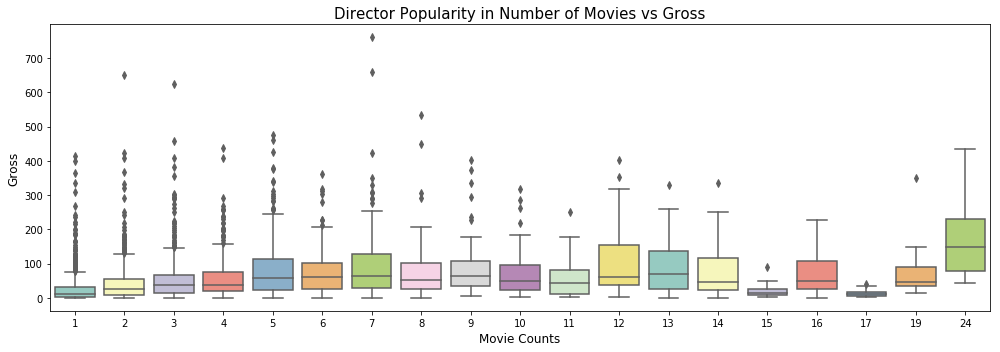

In [721]:
# Box-Plot of Gross vs Director Popularity in terms of Number of Movies
fig, ax = plt.subplots(figsize=(14,5))
sns.boxplot(x="Movie_Counts", y="Gross", data=df_director, palette="Set3",ax=ax)

ax.set_title("Director Popularity in Number of Movies vs Gross", fontsize=15)
ax.set_xlabel("Movie Counts", fontsize=12)
ax.set_ylabel("Gross", fontsize=12)

plt.tight_layout()

In [722]:
c = pd.value_counts(df_director['Popularity_Movie_Counts'])
print ('How Many directors with less/more than 12 movies: \n', c, sep = '')

How Many directors with less/more than 12 movies: 
Less than 12    3118
More than 12     188
Name: Popularity_Movie_Counts, dtype: int64


#### Popularity of Directors in terms of Number of Years worked

In [723]:
# Another way to determine Director popularity is 
# check in terms of how long the director has been making movies for

In [724]:
# Copy the relevant columns for Director in a new dataset
df_dir = df[['Director','Year','Gross']].copy()

df_dir = df_dir.reset_index()
df_dir = df_dir.drop(['Movie_Name'],1)

# View the data
df_dir.head()

,Director,Year,Gross
0,James Cameron,2009,760.505847
1,Gore Verbinski,2007,309.404152
2,Sam Mendes,2015,200.074175
3,Christopher Nolan,2012,448.130642
4,Andrew Stanton,2012,73.058679


In [725]:
# Create a pivot table with the Number of Years worked for each Director
p1 = pd.pivot_table(df_dir, index = ['Director'], values=['Year'],
               aggfunc= [np.max, np.min])

p1['Years'] = p1.amax['Year'] - p1.amin['Year']

p1.columns = p1.columns.droplevel(level = 1)

p1.reset_index('Director', inplace=True)

p1 = p1[['Director','Years']].copy()

p1 = p1.sort_values('Years',ascending = False)

p1.head()

,Director,Years
564,James Algar,59
1383,Steven Spielberg,41
927,Martin Scorsese,40
1519,William Friedkin,38
1207,Ridley Scott,36


In [726]:
# Merge this data with earlier dataset for directors, to include Gross
df_director = pd.merge(df_director, p1, on='Director', how='left')

df_director.head()

,Director,Gross,Movie_Counts,Popularity_Movie_Counts,Years
0,James Cameron,760.505847,7,Less than 12,25
1,Gore Verbinski,309.404152,7,Less than 12,12
2,Sam Mendes,200.074175,6,Less than 12,16
3,Christopher Nolan,448.130642,8,Less than 12,14
4,Andrew Stanton,73.058679,3,Less than 12,9


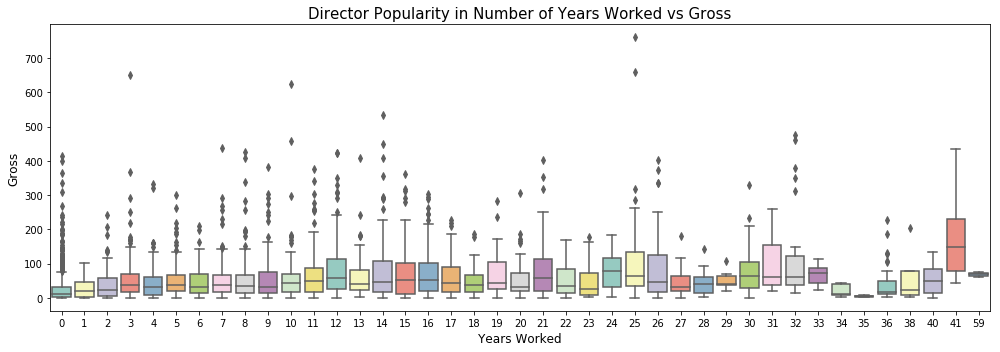

In [727]:
# Box-Plot of Gross vs Director Popularity in terms of Number of Movies
fig, ax = plt.subplots(figsize=(14,5))
sns.boxplot(x="Years", y="Gross", data=df_director, palette="Set3",ax=ax)

ax.set_title("Director Popularity in Number of Years Worked vs Gross", fontsize=15)
ax.set_xlabel("Years Worked", fontsize=12)
ax.set_ylabel("Gross", fontsize=12)


plt.tight_layout()

In [728]:
# Next we will bin the Number of Years worked for each Director into 2 categories
    # - Less than 30 Years
    # - More than 30 Years

In [729]:
bins1 = [0,30,60]
group_names1 = ['Less than 30','More than 30']
df_director['Popularity_Years_Counts'] = pd.cut(df_director['Years'], bins1, labels=group_names1)

In [730]:
c1 = pd.value_counts(df_director['Popularity_Years_Counts'])
print ('How Many directors with less/more than 30 years: \n', c1, sep = '')

How Many directors with less/more than 30 years: 
Less than 30    2271
More than 30     135
Name: Popularity_Years_Counts, dtype: int64


<b>
Comparison of the 2 graphs:
    - Popularity of Director in Count of Years Worked v. Gross
    - Popularity of Director in Count of Movies Made v. Gross
</b>

Text(0,0.5,'Gross')

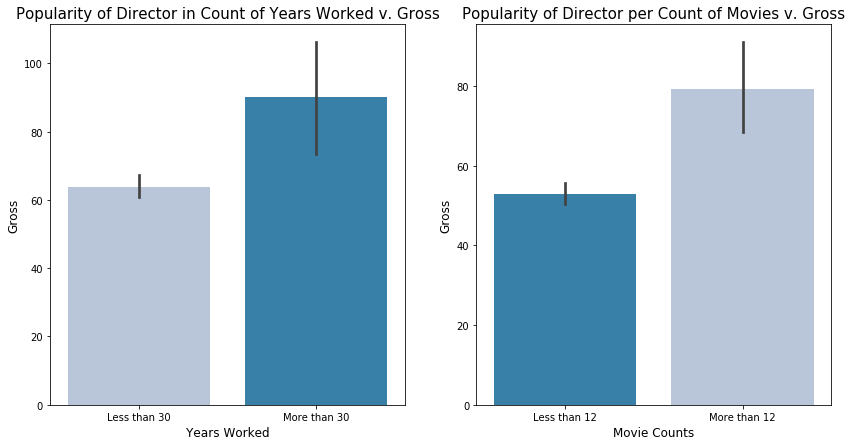

In [732]:
f, ax = plt.subplots(1,2, figsize=(14, 7))
Years = sns.barplot(x="Popularity_Years_Counts", y="Gross", data=df_director, palette="PuBu", ax=ax[0])
Years.axes.set_title('Popularity of Director in Count of Years Worked v. Gross', fontsize=15)
Years.axes.set_xlabel("Years Worked", fontsize=12)
Years.axes.set_ylabel("Gross", fontsize=12)


Fame = sns.barplot(x="Popularity_Movie_Counts", y="Gross", data=df_director, palette="PuBu_r", ax=ax[1])
Fame.axes.set_title('Popularity of Director per Count of Movies v. Gross', fontsize=15)
Fame.axes.set_xlabel("Movie Counts", fontsize=12)
Fame.axes.set_ylabel("Gross", fontsize=12)


#### Plotting Gross vs Popularity

In [733]:
df_director['Gross'].corr(df_director['Movie_Counts'])

0.2508356613020325

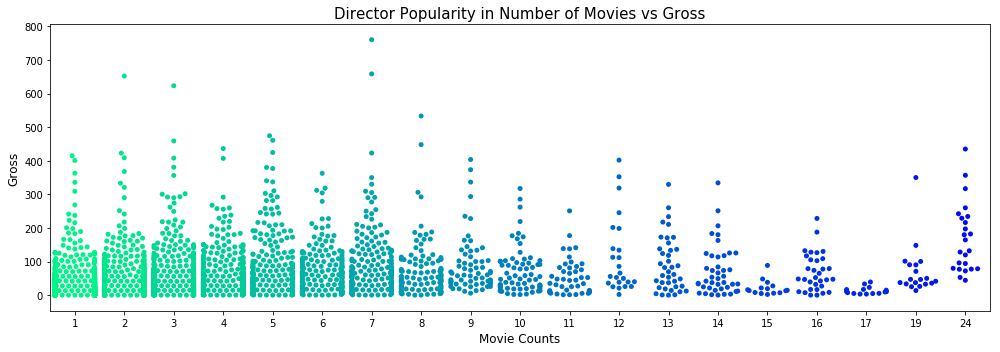

In [734]:
# Plot of Gross vs Director Popularity in terms of Number of Movies
fig, ax = plt.subplots(figsize=(14,5))
sns.swarmplot(x="Movie_Counts", y="Gross", data=df_director, palette="winter_r",ax=ax)

ax.set_title("Director Popularity in Number of Movies vs Gross", fontsize=15)
ax.set_xlabel("Movie Counts", fontsize=12)
ax.set_ylabel("Gross", fontsize=12)

plt.tight_layout()

In [735]:
df_director['Years'].corr(df_director['Gross'])

0.24654973672810498

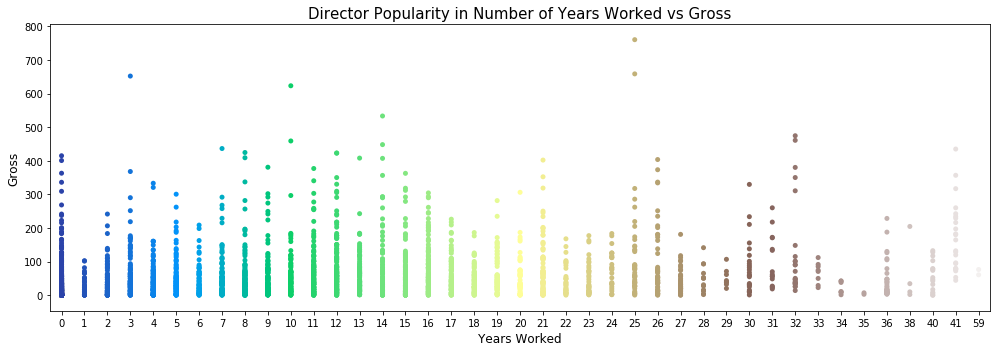

In [736]:
# Plot of Gross vs Director Popularity in terms of Number of Years
fig, ax = plt.subplots(figsize=(14,5))
sns.stripplot(x="Years", y="Gross", data=df_director, palette="terrain",ax=ax)

ax.set_title("Director Popularity in Number of Years Worked vs Gross", fontsize=15)
ax.set_xlabel("Years Worked", fontsize=12)
ax.set_ylabel("Gross", fontsize=12)

plt.tight_layout()

In [737]:
df_director['Years'].corr(df_director['Movie_Counts'])

0.85354002388579864

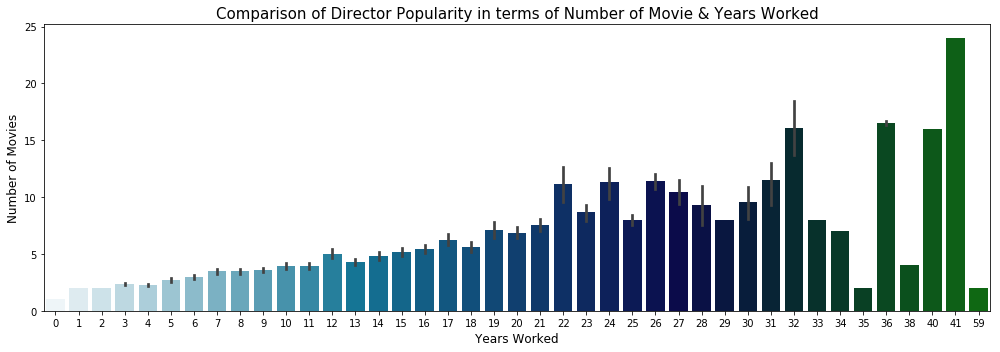

In [738]:
# Plot of Director Popularity in terms of Number of Movies vs Number of Years
fig, ax = plt.subplots(figsize=(14,5))
sns.barplot(x="Years", y="Movie_Counts", data=df_director, palette="ocean_r",ax=ax)

ax.set_title("Comparison of Director Popularity in terms of Number of Movie & Years Worked", fontsize=15)
ax.set_xlabel("Years Worked", fontsize=12)
ax.set_ylabel("Number of Movies", fontsize=12)

ax.patch.set_facecolor('w')
fig.set_facecolor('w')

plt.tight_layout()

In [739]:
# Observations:
    # For Years, here 0 means between 0-1 years
    # - There is an positive trend between Number of Years Worked & Movie Counts (0.85)
        # - Movie Counts increases with increase in Number of Years Worked
    # - There isn't a high association between Gross & Director Popularity (both measures)
        # For Movie Counts vs Gross  (0.25) : 
        # - Though the Directors with 24 (max) number of movies have the highest gross,
        # the trend does not continue for other groups
        # Gross for Directors with 12-19 movies is lower
        # though there is a trend of increasing Gross for Directors with 1-12 movies
        
        # For Years Worked vs Gross  (0.24) : 
        # We dont see a positive association trend here as well
        # Gross varies on multiple levels per the Director popularity per Years Worked        

## (6) Star Power vs Gross Revenue

#### Analysis of Start Power & how it affects highest Grossing Movies

Here we will try to find out - Do highest grossing actors make highest grossing movies? <br>
The analysis will be in 2 parts: <br>
    - How much the Star power of Top 100 Actors contibuted to Gross of Top 100 movies
    - Identify the Star in each movie & how Movies' Gross trends with Stars' Gross

Analysis Part 1

In [758]:
# We will first make a list of Top 100 actors by their individual Gross
# Then we will analyse whether a higher grossing actor being in a movie
# results in higher grossing movies or not

In [743]:
# Take a subset of columns from df for IMDB score analysis
df_actor = df[['Actor_1', 'Actor_2', 'Actor_3', 'Gross']].copy()

#Replace the nulls
df_actor = df_actor.fillna('Unknown')

#View the dataset
df_actor.head()

,Actor_1,Actor_2,Actor_3,Gross
Movie_Name,,,,
Avatar,Joel David Moore,CCH Pounder,Wes Studi,760.505847
Pirates of the Caribbean: At World's End,Orlando Bloom,Johnny Depp,Jack Davenport,309.404152
Spectre,Rory Kinnear,Christoph Waltz,Stephanie Sigman,200.074175
The Dark Knight Rises,Christian Bale,Tom Hardy,Joseph Gordon-Levitt,448.130642
John Carter,Samantha Morton,Daryl Sabara,Polly Walker,73.058679


In [746]:
# Take a subset of the rows with the top 100 Grossing movies from thisdataset
gross_top100 = df_actor.nlargest(100, 'Gross')

# View the dataset
# This is the list of Top 100 Grossing movies 
print ('Top 100 Grossing movies : \n ' )
gross_top100.head()

Top 100 Grossing movies : 
 


,Actor_1,Actor_2,Actor_3,Gross
Movie_Name,,,,
Avatar,Joel David Moore,CCH Pounder,Wes Studi,760.505847
Titanic,Kate Winslet,Leonardo DiCaprio,Gloria Stuart,658.672302
Jurassic World,Judy Greer,Bryce Dallas Howard,Omar Sy,652.177271
The Avengers,Robert Downey Jr.,Chris Hemsworth,Scarlett Johansson,623.279547
The Dark Knight,Heath Ledger,Christian Bale,Morgan Freeman,533.316061


In [747]:
# Create a list of all actor names
actors_list = df_actor['Actor_1'].tolist() + df_actor['Actor_2'].tolist() + df_actor['Actor_3'].tolist()

# Distinct list of actor names
actors_uni = set(actors_list)

# Convert back to list
actors = list(actors_uni)

# Number of distinct actors
l = len(actors)

In [748]:
# Create a new dataset with the distinct list of actor names
# And their individual gross
# Here we will consider the gross for an actor as the Sum of all the movies' gross they have starred in

cols = ['Name','Total']
actor_sum = pd.DataFrame(index=range(1,l), columns=cols)

for i in range(1, l):
    name = actors[i]
    total = df_actor['Gross'][(df_actor['Actor_1'] == name) | (df_actor['Actor_2'] == name) | (df_actor['Actor_3'] == name)].sum()
    
    actor_sum['Name'][i] = name
    actor_sum['Total'][i] = total

In [749]:
# Data types of the dataset
actor_sum.dtypes

# Convert Gross column to numeric
actor_sum['Total'] = actor_sum['Total'].apply(pd.to_numeric)

# Now create a new dataset with the top 100 from this list
actor_s_top100 = actor_sum.nlargest(100, 'Total')

actor_s_top100 = actor_s_top100.reset_index(drop=True)


We have a list of highest grossing movies of all time & a list of highest grossing actors of all time

Now lets see if the highest grossing actors contributed to the highest grossing movies or not

In [750]:
# Add a column to Top 100 Actor's list to include whether they were part of the Top 100 Grossing movies or not
val = 'Yes'

for i, row1 in actor_s_top100.iterrows():
    for j, row2 in gross_top100.iterrows():
        if ( (row1.Name == row2.Actor_1) | (row1.Name == row2.Actor_2) | (row1.Name == row2.Actor_3) ):
            actor_s_top100.set_value(i, 'Presence', val)
            
actor_s_top100[['Presence']] = actor_s_top100[['Presence']].fillna('No')

In [752]:
# This is the list of Top 100 actors 
# per the sum of grosses of all their movies
print ('Top 100 Grossing actors : \n ')
actor_s_top100.head()

Top 100 Grossing actors : 
 


,Name,Total,Presence
0,Tom Hanks,3585.548663,Yes
1,Robert Downey Jr.,3539.261207,Yes
2,Harrison Ford,3479.593335,Yes
3,Morgan Freeman,3355.235438,Yes
4,Johnny Depp,3225.560904,Yes


In [753]:
print ('Count of Top Grossing Actors present in Top Grossing Movies or not : \n ')
actor_s_top100.Presence.value_counts()

Count of Top Grossing Actors present in Top Grossing Movies or not : 
 


Yes    69
No     31
Name: Presence, dtype: int64

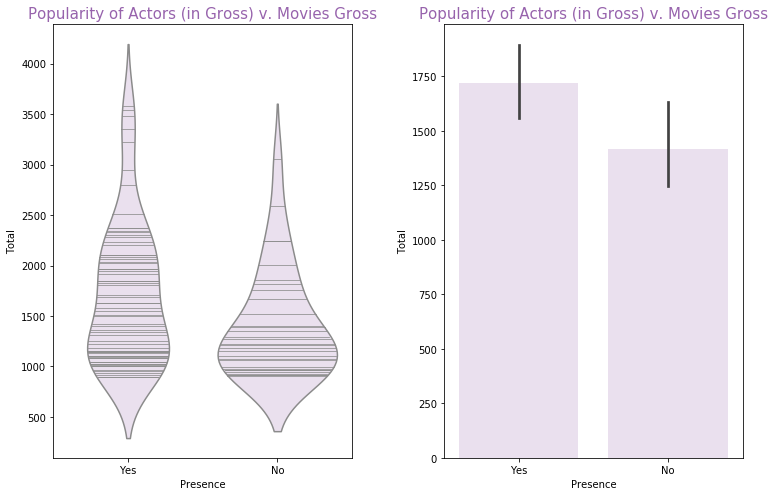

In [754]:
f, ax = plt.subplots(1, 2, figsize=(11, 7))

sns.violinplot(x="Presence", y="Total", data=actor_s_top100, color='#EBDEF0', inner="stick", ax=ax[0])
ax[0].set_title('Popularity of Actors (in Gross) v. Movies Gross', fontsize=15,color='#7D3C98', alpha = 0.8)

sns.barplot(x="Presence", y="Total", data=actor_s_top100, color='#EBDEF0', ax=ax[1])
ax[1].set_title('Popularity of Actors (in Gross) v. Movies Gross', fontsize=15,color='#7D3C98', alpha = 0.8)

f.tight_layout()

In [ ]:
# From the above we can see that more top Grossing Actors were part of the Top Grossing Movies
# So,  if Top Grossing Actors are present in a movie, it can generate higher Grosses
    # Meaning, there is a relation between top grossing actors <-> top Grossing movies
# Now let's group the Total Gross of the top actors to visulaize this

In [759]:
bins = [0,1000,1500,2000,2500,3000,3500,4000]
group_names = ['0-1k','1-1.5k','1.5-2k','2-2.5k','2.5-3k','3-3.5k','3.5-4k']
actor_s_top100['Total_groups'] = pd.cut(actor_s_top100['Total'], bins, labels=group_names)

# View the dataset with the newly added column
actor_s_top100[:20]

,Name,Total,Presence,Total_groups
0,Tom Hanks,3585.548663,Yes,3.5-4k
1,Robert Downey Jr.,3539.261207,Yes,3.5-4k
2,Harrison Ford,3479.593335,Yes,3-3.5k
3,Morgan Freeman,3355.235438,Yes,3-3.5k
4,Johnny Depp,3225.560904,Yes,3-3.5k
5,Tom Cruise,3055.254204,No,3-3.5k
6,Scarlett Johansson,2947.340812,Yes,2.5-3k
7,Will Smith,2793.312894,Yes,2.5-3k
8,Matt Damon,2591.246470,No,2.5-3k
9,John Ratzenberger,2509.861113,Yes,2.5-3k


Text(0,0.5,'Total')

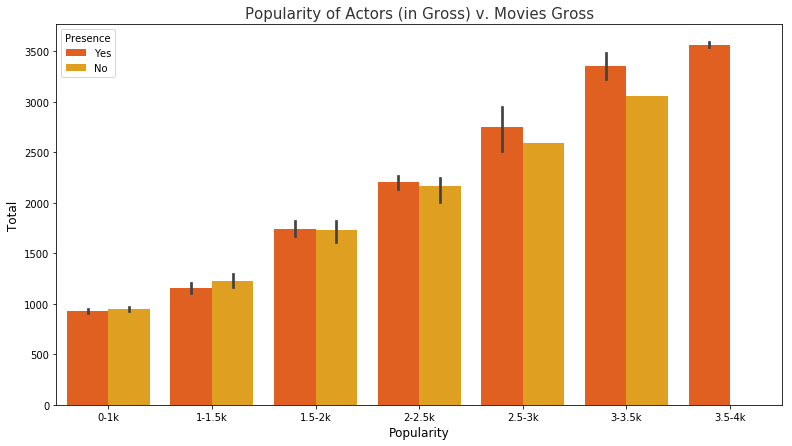

In [779]:
f, ax = plt.subplots(figsize=(13, 7))
sns.barplot(x="Total_groups", y="Total", hue="Presence", data=actor_s_top100, palette = "autumn")
ax.set_title('Popularity of Actors (in Gross) v. Movies Gross', fontsize=15,color='k', alpha = 0.8)
ax.set_xlabel("Popularity", fontsize=12)
ax.set_ylabel("Total", fontsize=12)

In [ ]:
# This shows that the Top Grossing Movies group have more top grossing actors
# Lower grossing movie groups have less higher grossing actors

Analysis Part 2

In [760]:
# For each movie, we will list down the highest grossing actor out of the 3 
# This actor will be considered the star of that movie
# Then we will perform analysis between the star's gross & the movie's gross

In [761]:
# We will use the same movies list created earlier
# However for the Gross of actors this time we will 
# consider the mean of gross of their movies
# instead of sum

In [762]:
# Create a new dataset with the distinct list of actor names
# And their individual gross
# Here we will consider the gross for an actor as the Mean of all the movies' gross they have starred in

cols = ['Name','Total']
actor_mean = pd.DataFrame(index=range(1,l), columns=cols)

for i in range(1, l):
    name = actors[i]
    total = df_actor['Gross'][(df_actor['Actor_1'] == name) | (df_actor['Actor_2'] == name) | (df_actor['Actor_3'] == name)].mean()
    
    actor_mean['Name'][i] = name
    actor_mean['Total'][i] = total

In [763]:
# Data types of the dataset
actor_mean.dtypes

# Convert Gross column to numeric
actor_mean['Total'] = actor_mean['Total'].apply(pd.to_numeric)


In [764]:
# Now, we will use the mean of gross for each actor, from this list
# To add 2 columns in the original dataset, to include
# - Star (Highest grossing actor out of the 3 actors for each movie)
# - Star_Gross (their individual mean gross)

In [765]:
# Function to find the larget of 3 numbers
def largest(a, b, c):
    if (a > b) :
        if (a > c) :
            return a
        else :
            return c
    elif (b > c):
        return b
    else :
        return c

In [768]:
for i, row1 in df_actor.iterrows():
    actor_1_gross = 0
    actor_2_gross = 0
    actor_3_gross = 0
    
    actor_1_name = ""
    actor_2_name = ""
    actor_3_name = ""
    
    for j, row2 in actor_mean.iterrows():
        if (row1.Actor_1 == row2.Name):
            actor_1_gross = row2.Total
            actor_1_name = row2.Name
        if (row1.Actor_2 == row2.Name):
            actor_2_gross = row2.Total
            actor_2_name = row2.Name
        if (row1.Actor_3 == row2.Name):
            actor_3_gross = row2.Total
            actor_3_name = row2.Name
      
    top = largest(actor_1_gross, actor_2_gross, actor_3_gross)
    if (top == actor_1_gross):
        star = actor_1_name
    if (top == actor_2_gross):
        star = actor_2_name
    if (top == actor_3_gross):
        star = actor_3_name 
            
    df_actor.set_value(i, 'Star', star)
    df_actor.set_value(i, 'Star_Gross', top)       

In [769]:
# View the updated dataset
df_actor.head()

,Actor_1,Actor_2,Actor_3,Gross,Star,Star_Gross
Movie_Name,,,,,,
Avatar,Joel David Moore,CCH Pounder,Wes Studi,760.505847,Joel David Moore,238.700810
Pirates of the Caribbean: At World's End,Orlando Bloom,Johnny Depp,Jack Davenport,309.404152,Orlando Bloom,245.348381
Spectre,Rory Kinnear,Christoph Waltz,Stephanie Sigman,200.074175,Stephanie Sigman,200.074175
The Dark Knight Rises,Christian Bale,Tom Hardy,Joseph Gordon-Levitt,448.130642,Tom Hardy,116.196032
John Carter,Samantha Morton,Daryl Sabara,Polly Walker,73.058679,Polly Walker,78.173021


In [770]:
# See the correlation
df_actor['Gross'].corr(df_actor['Star_Gross'])

0.66562132592673262

In [771]:
# Find out the regression value
regression = smf.ols('Gross ~ Star_Gross ', data=df_actor).fit()
regression.rsquared

0.44305174952846116

In [772]:
# lets also view the correlation for the top 1000 movies
top_1000 = df_actor.nlargest(1000, 'Gross')
top_1000['Gross'].corr(top_1000['Star_Gross'])

0.6670580039782178

Text(0,0.5,'Star Gross')

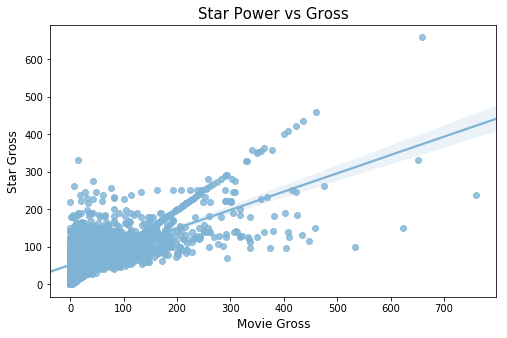

In [793]:
# View Gross vs Star Gross
f, ax = plt.subplots(figsize=(8, 5))
sns.regplot(x = 'Gross', y = 'Star_Gross', data=df_actor, color = '#7FB3D5')
ax.set_title("Star Power vs Gross", fontsize=15)
ax.set_xlabel("Movie Gross", fontsize=12)
ax.set_ylabel("Star Gross", fontsize=12)

Text(0,0.5,'Star Gross')

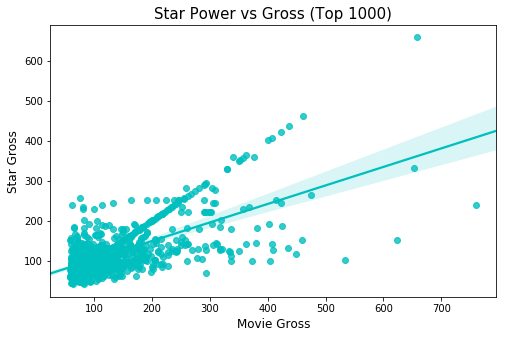

In [792]:
f, ax = plt.subplots(figsize=(8, 5))
sns.regplot(x = 'Gross', y = 'Star_Gross', data=top_1000, color = 'c')
ax.set_title("Star Power vs Gross (Top 1000)", fontsize=15)
ax.set_xlabel("Movie Gross", fontsize=12)
ax.set_ylabel("Star Gross", fontsize=12)

In [775]:
# This shows a positive association between Movies Gross & Star Power

## (7) Summary

### Budget vs. Gross Revenue

<u> <b> Observations: </b> </u> <br>
As per our analysis, there is a correlation between budget and box office grosses, 
confirming our initital hypothesis that higher production costs, on average, 
lead to higher revenues (given the amount invested in star power, marketing, etc.) 

### IMDB Ratings vs Gross Revenue

After initial analysis of IMDB scores & Gross, we did not get a high correlation between the two 
Here, we noted that this analysis might be affected by the Number of Voters - 
Hence we extended the analysis to include Number of Voters
And then viewed the relationship between the 3 variables <br>

<u> <b> Observations from analysis between the 3 variables (IMDB Score, Number of Votes & Gross) : </b> </u>

<u> Number of Voters vs Gross </u>
 - There are more movies with Low Number of votes (0-25,000 voters), in general
 - There are more movies which grossed between 0-100 million 
 - It could be that because of this trend, that we see a higher correlation between Gross & Number of Voters (0.63)

<u> IMDB score vs Gross </u>
 - There is lesser correlation between IMDB score & Gross (0.25)
 - A higer IMDB score does not neccessarily imply a higher Gross
 - This might be because the IMDB score is biased, depending on the Number of Voters, or other factors

<u> Number of Voters vs IMDB score </u>
 - Movies with Good to Avegage number of voters (25,000 - 150,000) have higher IMDB scores (above 7)
 - Movies with High Number of Voters (above 150,000) have higher IMDB scores (above 8.5)
 - Movies with Low Number of Voters have Lower IMDB scores
     - However, since low group of voters comprises for the max number of voters
     - Low number of Voters (0-25,000) also correspond to most IMDB scores between (0-7)

### MPAA Ratings vs. Gross Revenue

<u> <b> Observations: </b> </u>
    - PG-13, PG, G & R are the highest Grossing
    - Whereas the most popular Ratings are in order: R, PG-13, PG, G
    - So, Gross is higher for Movies with Ratings  PG-13, PG, G - but for R Rating there is a lesser impact

### Genre vs Gross Revenue

<u> <b> Observations: </b> </u>
     - Drama & Comedy are the most popular Genres over most of the time (popular)
         - Followed by Thriller, Action & Adventure
    - The trends for highest Grossing genres are different from the most popular Genres trends
        - However, Comedy, Adventure, Action are higher Grossers than Drama

### Director Popularity vs Gross Revenue

First we retreived the list of directors, & analyzed their popularity in 2 ways: <br>
     - Number of movies directed (Since more successful directors are hired more)
     - Number of Years worked (Since a more successful director is more likey to continue making movies)


<u> <b> Observations : </b> </u>
   <u> Anslysis was done between: </u>
        - Number of movies for each director
        - Number of years worked for each director
        - Gross
        
     - There is an positive trend between Number of Years Worked & Movie Counts (0.85)
         - Movie Counts increases with increase in Number of Years Worked
     - There isn't a high association between Gross & Director Popularity (both measures)
        - For Movie Counts vs Gross  (0.25) : 
         - Though the Directors with 24 (max) number of movies have the highest gross,
         the trend does not continue for other groups
        - Gross for Directors with 12-19 movies is lower
         though there is a trend of increasing Gross for Directors with 1-12 movies
        <br>
         For Years Worked vs Gross  (0.24) : <br>
         We dont see a positive association trend here as well <br>
         Gross varies on multiple levels per the Director popularity per Years Worked        

### Star Power vs Gross Revenue

<u> <b> Observations : </b> </u>

Here we tried to find out - <br>
Do highest grossing actors make highest grossing movies? <br>
The analysis was done be in 2 parts: 
<br>
<br>
- How much the Star power of Top 100 Actors contibuted to Gross of Top 100 movies
- Identify the Star in each movie & how Movies' Gross trends with Stars' Gross

 We first made a list of Top 100 actors by their individual Gross
 Then we will analysed whether a higher grossing actor being in a movie
 results in higher grossing movies or not

<br>
 This showed that the Top Grossing Movies group have more top grossing actors
 Lower grossing movie groups have less higher grossing actors
    <br>
    <br>
 For each movie, we will list down the highest grossing actor out of the 3 
 This actor will be considered the star of that movie
 Then we will perform analysis between the star's gross & the movie's gross
<br>

 This shows a positive association between Movies Gross & Star Power

### In conclusion

    Budget, Star Power have a high positive impact on Gross Revenue
    Gross is also higher for certain MPAA Ratings (PG-13, PG, G) & Genres (Comedy, Adventure, Action)
    Director Popularity & IMDB Score do not have a lot of impact on Gross
    Additionally, Number of Votes does have a positive association with Gross, as compared to IMDB scores

## Thank You